In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transaction = pd.read_csv('transaction_data.csv')

In [3]:
transaction['DATETIMEIN'] = pd.to_datetime(transaction['DATETIMEIN'])

In [4]:
transaction.columns

Index(['DBNO', 'TRANSNO', 'Facility NAME', 'DATETIMEIN', 'WEIGHTNETT',
       'ITEM GROUP NAME', 'ITEM NAME', 'INNOUTUT', 'ITEM QTY', 'Volume m3',
       'Density factor (t/m3)', 'kg per item', 'tot tonnes',
       'Disposal Facility', 'tf_stockpile_vol', 'df_stockpile_vol',
       'tf_stockpile_wt', 'df_stockpile_wt'],
      dtype='object')

In [5]:
transaction['Facility NAME'].unique()

array(['Venus Bay Transfer Station', 'Walkerville Transfer Station',
       'Koonwarra Transfer Station', 'Korumburra Transfer Station',
       'Mirboo North Transfer Station', 'Foster Transfer Station'],
      dtype=object)

In [6]:
transaction['Disposal Facility'].unique()

array([nan, 'GT Recycling', 'MRI', 'Envirodrums', 'Koonwarra Landfill',
       'Norstar', 'Visy'], dtype=object)

In [7]:
transaction.loc[4713]

DBNO                                              2
TRANSNO                                       39606
Facility NAME            Venus Bay Transfer Station
DATETIMEIN                      2017-09-03 13:30:28
WEIGHTNETT                                        0
ITEM GROUP NAME                                 Oil
ITEM NAME                             46) Motor Oil
INNOUTUT                                         IN
ITEM QTY                                          2
Volume m3                                       NaN
Density factor (t/m3)                          0.92
kg per item                                     NaN
tot tonnes                                  0.00184
Disposal Facility                               NaN
tf_stockpile_vol                              25.45
df_stockpile_vol                                NaN
tf_stockpile_wt                              -7.046
df_stockpile_wt                                 NaN
Name: 4713, dtype: object

In [8]:
transaction['tf_stockpile_vol'] = np.nan
transaction['df_stockpile_vol'] = np.nan
transaction['tf_stockpile_wt'] = np.nan
transaction['df_stockpile_wt'] = np.nan

In [9]:
def stockpile(name_field, vol_field, wt_field):
    sign = {
        "Facility NAME": {
            "IN": 1,
            "OUT": -1
        },
        "Disposal Facility": {
            "IN": -1,
            "OUT": 1
        }
    }
    for facility in transaction[name_field].unique():
        if facility == np.nan:
            continue
        facility_mask = transaction[name_field] == facility
        vol = 0
        wt = 0
        for index, row in transaction.loc[facility_mask].sort_values(by=['DATETIMEIN']).iterrows():
            if not np.isnan(row['Volume m3']):
                vol += sign[name_field][row['INNOUTUT']]*row['Volume m3']
            if not np.isnan(row['tot tonnes']):
                wt += sign[name_field][row['INNOUTUT']]*row['tot tonnes']
            transaction.at[index, vol_field] = round(vol, 3)
            transaction.at[index, wt_field] = round(wt, 3)

In [10]:
stockpile('Facility NAME', 'tf_stockpile_vol', 'tf_stockpile_wt')

In [11]:
stockpile('Disposal Facility', 'df_stockpile_vol', 'df_stockpile_wt')

In [20]:
transaction.sort_values(by=['DATETIMEIN']).head()

,DBNO,TRANSNO,Facility NAME,DATETIMEIN,WEIGHTNETT,ITEM GROUP NAME,ITEM NAME,INNOUTUT,ITEM QTY,Volume m3,Density factor (t/m3),kg per item,tot tonnes,Disposal Facility,tf_stockpile_vol,df_stockpile_vol,tf_stockpile_wt,df_stockpile_wt
4774,3,58882,Koonwarra Transfer Station,2017-09-01 07:48:06,0.0,Domestic Waste,62) LITTER COLL .5 m,IN,1,0.50,0.08,NaN,0.0400,NaN,0.50,NaN,0.040,NaN
1334,3,58883,Koonwarra Transfer Station,2017-09-01 08:07:30,0.0,Domestic Waste,04) Car Boot/Wagon,IN,1,0.50,0.13,NaN,0.0650,NaN,1.00,NaN,0.105,NaN
4801,4,33284,Korumburra Transfer Station,2017-09-01 08:42:20,0.0,Domestic Waste,62) LITTER COLL .5 m,IN,1,0.50,0.08,NaN,0.0400,NaN,0.50,NaN,0.040,NaN
3402,4,33285,Korumburra Transfer Station,2017-09-01 08:50:06,0.0,Mixed Recyclables,42a) 0.25 Mixed Recycles,IN,1,0.25,0.01,NaN,0.0025,NaN,0.75,NaN,0.043,NaN
2197,3,58884,Koonwarra Transfer Station,2017-09-01 08:57:44,0.0,Steel,41) 1m STEEL,IN,1,1.00,0.22,NaN,0.2200,NaN,2.00,NaN,0.325,NaN


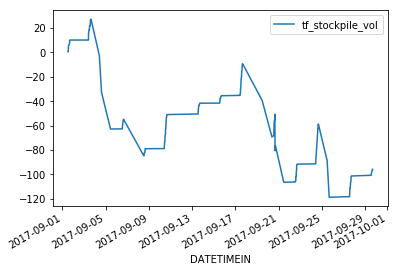

In [19]:
transaction.loc[transaction['Facility NAME'] == 'Mirboo North Transfer Station'].plot(x='DATETIMEIN', y='tf_stockpile_vol')

In [14]:
transaction.to_csv('transaction_data.csv', index=False, header=True)